# Deep Neural Network for the Rossmann Stores Sales competition.

## Objective: 
### To provide a Deep Neural Network entry to Rossmann Stores Sales competition.

### Data Files

<ol>
    <li> <strong>train.csv</strong> - historical data including Sales </li>
    <li> <strong>test.csv</strong> - historical data excluding Sales </li>
    <li> <strong>sample_submission.csv</strong> - a sample submission file in the correct format</li>
    <li> <strong>store.csv</strong> - supplemental information about the stores</li>
</ol>

### Data Fields

Most of the fields are self-explanatory. The following are descriptions for those that aren't.
<ol>
    <li> <strong>Id</strong> - an Id that represents a (Store, Date) duple within the test set</li>
    <li><strong>Store</strong> - a unique Id for each store</li>
    <li><strong>Sales</strong> - the turnover for any given day (this is what you are predicting)</li>
    <li><strong>Customers</strong> - the number of customers on a given day</li>
    <li><strong>Open</strong> - an indicator for whether the store was open: 0 = closed, 1 = open</li>
    <li><strong>StateHoliday</strong> - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None</li>
    <li><strong>SchoolHoliday</strong> - indicates if the (Store, Date) was affected by the closure of public schools</li>
    <li><strong>StoreType</strong> - differentiates between 4 different store models: a, b, c, d</li>
    <li><strong>Assortment</strong> - describes an assortment level: a = basic, b = extra, c = extended</li>
    <li><strong>CompetitionDistance</strong> - distance in meters to the nearest competitor store</li>
    <li><strong>CompetitionOpenSince[Month/Year]</strong> - gives the approximate year and month of the time the nearest competitor was opened</li>
    <li><strong>Promo</strong> - indicates whether a store is running a promo on that day</li>
    <li><strong>Promo2</strong> - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating</li>
    <li><strong>Promo2Since[Year/Week]</strong> - describes the year and calendar week when the store started participating in Promo2</li>
    <li><strong>PromoInterval</strong> - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store </li>
</ol>

### 1) Loading the required libraries

In [33]:
import numpy as np
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns

### 2) Loading the datasets

In [2]:
dataset = pd.read_csv('/Users/apple/Desktop/Study Materials - Essex Uni/889-Neural Networks/sales data/train.csv',low_memory=False)
dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
store_data = pd.read_csv('/Users/apple/Desktop/Study Materials - Essex Uni/889-Neural Networks/sales data/store.csv',low_memory=False)
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### 3) Data Merging 

In [4]:
fin_data = dataset.merge(store_data, on = ['Store'], how = 'inner')
fin_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


### 4) Data Analysis

In [5]:
# Informations about the merged data.
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [6]:
print(f'The size of the training dataset is {fin_data.shape}')

The size of the training dataset is (1017209, 18)


In [7]:
print('Distinct Number of Stores:', len(fin_data['Store'].unique()))
print('Average daily sales of all Stores:', round(fin_data['Sales'].mean(), 2))

Distinct Number of Stores: 1115
Average daily sales of all Stores: 5773.82


In [8]:
# Checking the total sales for a stores that is not open.
fin_data.loc[fin_data['Open'] == 0, 'Sales'].sum()

0

In [9]:
# Checking the average sales for a stores on the state holidays.
fin_data.loc[fin_data['StateHoliday'] != 0, 'Sales'].mean()

5773.818972305593

In [10]:
# Checking the average sales for a stores on the School holidays.
fin_data.loc[fin_data['SchoolHoliday'] != 0, 'Sales'].mean()

6476.522207119706

In [11]:
fin_data['DayOfWeek'].value_counts()

4    145845
5    145845
3    145665
2    145664
1    144730
6    144730
7    144730
Name: DayOfWeek, dtype: int64

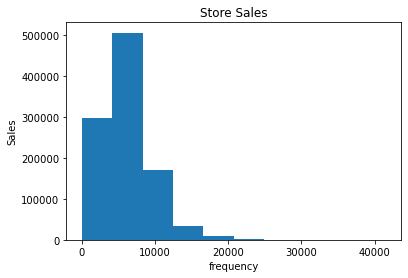

In [31]:
# Plotting histogram of store sales.
plt.hist(fin_data['Sales'])
plt.title('Store Sales')
plt.ylabel('Sales')
plt.xlabel('frequency')
plt.show()

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

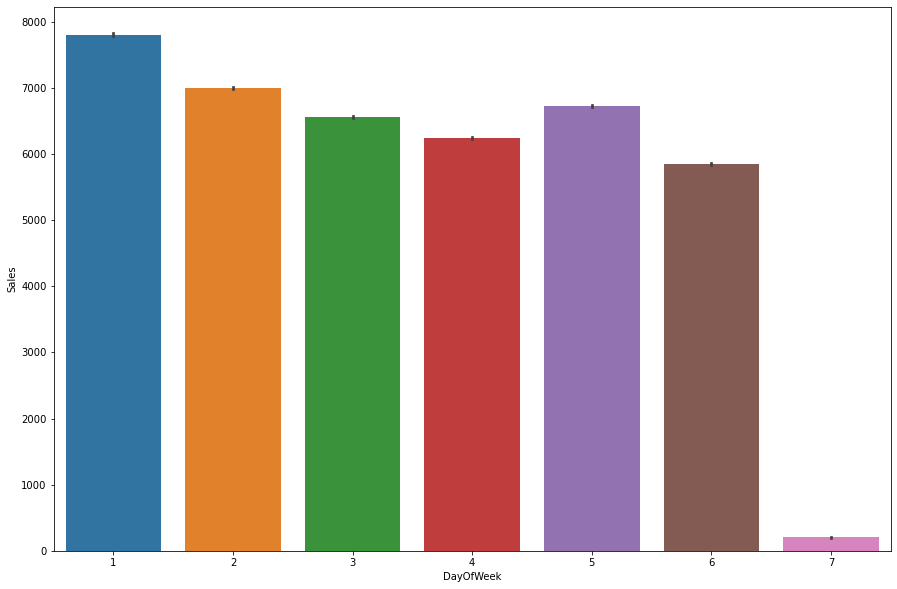

In [34]:
# DayOfWeek vs Sales barplot
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="DayOfWeek", y="Sales", data=fin_data)

<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

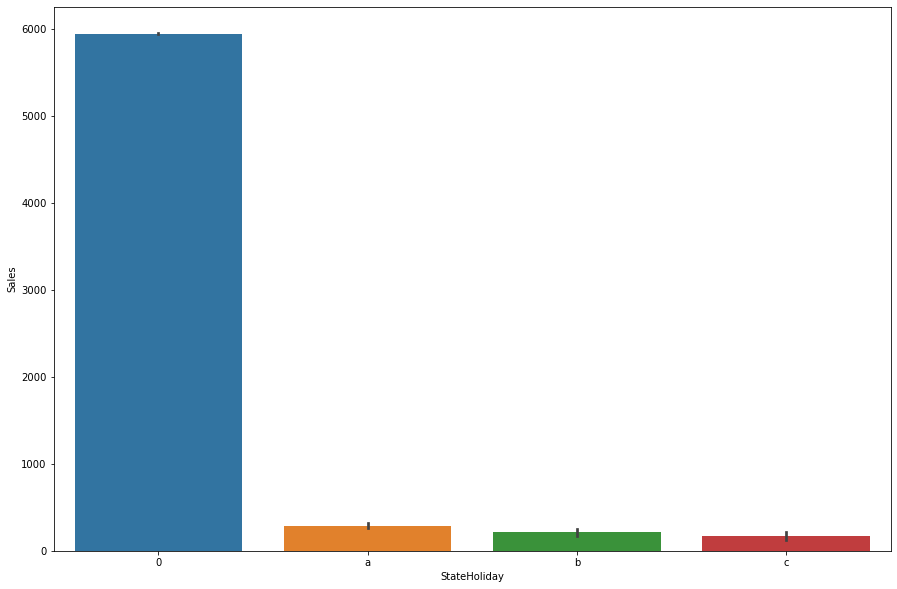

In [35]:
# StateHoliday vs Sales barplot
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="StateHoliday", y="Sales", data=fin_data)

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

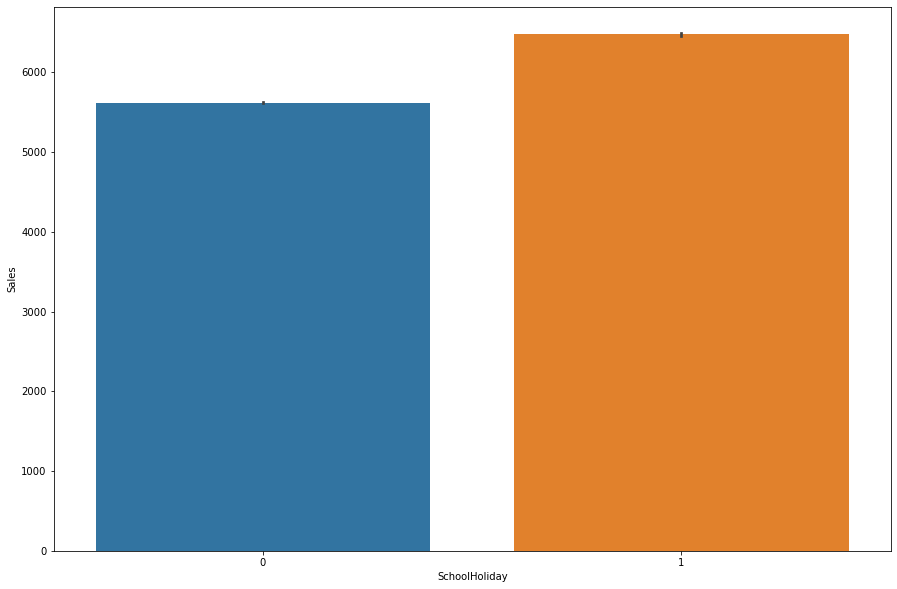

In [36]:
# SchoolHoliday vs Sales barplot
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="SchoolHoliday", y="Sales", data=fin_data)

### 5) Data Cleansing

In [12]:
fin_data.isnull().sum() # Checking for the null values

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

#### Date formatting

In [13]:
fin_data['Date'] = pd.to_datetime(fin_data['Date'], infer_datetime_format = True)

fin_data['Year'] = fin_data['Date'].dt.year
fin_data['Month'] = fin_data['Date'].dt.month
fin_data['Quarter'] = fin_data['Date'].dt.quarter
fin_data['Week'] = fin_data['Date'].dt.isocalendar().week
fin_data['Day'] = fin_data['Date'].dt.day

fin_data['Season'] = np.where(fin_data['Month'].isin([3,4,5]), "Spring",
                 np.where(fin_data['Month'].isin([6,7,8]), "Summer",
                 np.where(fin_data['Month'].isin([9,10,11]), "Fall",
                 np.where(fin_data['Month'].isin([12,1,2]), "Winter", "None"))))

In [14]:
fin_data.iloc[:,-6:].head() # Checking the date format changes

,Year,Month,Quarter,Week,Day,Season
0,2015,7,3,31,31,Summer
1,2015,7,3,31,30,Summer
2,2015,7,3,31,29,Summer
3,2015,7,3,31,28,Summer
4,2015,7,3,31,27,Summer


In [15]:
fin_data['CompetitionDistance'] = fin_data['CompetitionDistance'].fillna(fin_data['CompetitionDistance'].mean())
fin_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Quarter,Week,Day,Season
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,3,31,31,Summer
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,3,31,30,Summer
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,3,31,29,Summer
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,3,31,28,Summer
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,3,31,27,Summer


In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

target_data = ['Sales']
num_col = ['Customers', 'Open', 'Promo', 'Promo2', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance']
cat_col = ['DayOfWeek', 'Quarter', 'Month', 'Year', 'StoreType', 'Assortment', 'Season']

def create_encode(df1, col1):
    le = LabelEncoder()
    a = le.fit_transform(fin_data[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    col_names = [col+ "_" + str(i) for i in le.classes_]
    return (pd.DataFrame(ohe.fit_transform(a), columns = col_names))

In [17]:
X = fin_data[num_col]

for col in cat_col:
    X_df = create_encode(fin_data, col)
    X = pd.concat([X, X_df], axis=1)

In [18]:
print('Shape of Data: ', X.shape)
print('Distinct Datatypes: ', X.dtypes.unique())

Shape of Data:  (1017209, 44)
Distinct Datatypes:  [dtype('int64') dtype('O') dtype('float64')]


In [19]:
X['StateHoliday'] = np.where(X['StateHoliday']=='0', 0,1)
X.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [20]:
Y=fin_data[target_data]
Y.head()

,Sales
0,5263
1,5020
2,4782
3,5011
4,6102


### 6) Build a Model and Train the Model

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1000)

In [22]:
# Here we define the architecture of our network. 
# The number of neurons in the input layer is defined by the number of input values in our dataset. 
# For this architecture we are going to use 3 neurons in our hidden layer.
# The number of neurons in the output layer is defined by the number of expected values, in this case we expect a single value 1 or 0.
model =  tf.keras.models.Sequential() # we create a Neural Network model that is Sequential, which means each layer we add will be connected to the previous one. 
model.add(tf.keras.Input(shape=[44])) # Input layer
model.add(tf.keras.layers.Dense(120, activation='sigmoid')) # Hidden Layer, it would be a dense layer. Passing the activation function sigmoid. 120 neurons
model.add(tf.keras.layers.Dense(120, activation='sigmoid')) # Hidden Layer, it would be a dense layer. Passing the activation function sigmoid. 120 neurons
model.add(tf.keras.layers.Dense(120, activation='sigmoid')) # Hidden Layer, it would be a dense layer. Passing the activation function sigmoid. 120 neurons
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Adding a output layer, activation function is sigmoid
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               5400      
                                                                 
 dense_1 (Dense)             (None, 120)               14520     
                                                                 
 dense_2 (Dense)             (None, 120)               14520     
                                                                 
 dense_3 (Dense)             (None, 1)                 121       
                                                                 
Total params: 34,561
Trainable params: 34,561
Non-trainable params: 0
_________________________________________________________________


In [23]:
# We define which optimizer and which error loss are we using to update the weights of the network.
sgd = tf.keras.optimizers.SGD(learning_rate=0.8,momentum=0.3)
mse = tf.keras.losses.MeanSquaredError()

In [24]:
# we compile our model 
model.compile(optimizer=sgd, loss=mse, metrics=['mean_absolute_error'])

In [25]:
# After compiling the model we are able to start the training using the 'fit' function. 
# We need to make use of our training dataset (X and Y).
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

Epoch 1/10
11444/11444 [==============================] - 32s 3ms/step - loss: 48167848.0000 - mean_absolute_error: 5773.5854 - val_loss: 48164700.0000 - val_mean_absolute_error: 5767.3511
Epoch 2/10
11444/11444 [==============================] - 28s 2ms/step - loss: 48167848.0000 - mean_absolute_error: 5773.5850 - val_loss: 48164700.0000 - val_mean_absolute_error: 5767.3511
Epoch 3/10
11444/11444 [==============================] - 28s 2ms/step - loss: 48167900.0000 - mean_absolute_error: 5773.5825 - val_loss: 48164700.0000 - val_mean_absolute_error: 5767.3511
Epoch 4/10
11444/11444 [==============================] - 29s 3ms/step - loss: 48167932.0000 - mean_absolute_error: 5773.5913 - val_loss: 48164700.0000 - val_mean_absolute_error: 5767.3511
Epoch 5/10
11444/11444 [==============================] - 29s 3ms/step - loss: 48167836.0000 - mean_absolute_error: 5773.5723 - val_loss: 48164700.0000 - val_mean_absolute_error: 5767.3511
Epoch 6/10
11444/11444 [==============================]

In [26]:
result = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)): 
    print('Metric', model.metrics_names[i], ':', str(round(result[i], 2)))

6358/6358 [==============================] - 11s 2ms/step - loss: 48066448.0000 - mean_absolute_error: 5773.9619
Metric loss : 48066448.0
Metric mean_absolute_error : 5773.96


In [27]:
prediction = model.predict(X_test)
print(prediction)

6358/6358 [==============================] - 9s 1ms/step
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [28]:
sample_data = pd.read_csv('/Users/apple/Desktop/Study Materials - Essex Uni/889-Neural Networks/sales data/sample_submission.csv')
sample_data.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [29]:
final_pred = pd.DataFrame(prediction, columns=['Sales'])
final_pred['Id'] = sample_data['Id']
final_pred.head()

,Sales,Id
0,1.0,1.0
1,1.0,2.0
2,1.0,3.0
3,1.0,4.0
4,1.0,5.0
